# Import Library

In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn import metrics

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataset=pd.read_csv('/content/drive/MyDrive/IoT Project Patient Monitoring System  /iot_ml.csv')
dataset.head(5)

,patient_id,Snoring_Range_dB,Respiration_Rate_bpm,Body_Temperature,Limb_Movement_Rate,Blood_Oxygen_Range,Rapid_Eye_Movement,Heart_Rate,Suger_Level,health_status
0,1,93.80,25.680,91.840,16.600,95.000,99.60,74.20,4,Normal
1,2,91.64,25.104,91.552,15.880,89.552,98.88,72.76,3,Bad
2,3,60.00,20.000,96.000,10.000,95.000,85.00,60.00,1,Bad
3,4,85.76,23.536,90.768,13.920,88.768,96.92,68.84,3,Bad
4,5,48.12,17.248,97.872,6.496,96.248,72.48,60.00,4,Bad


In [6]:
print("Data shape:",dataset.shape)

Data shape: (630, 10)


#  Checking for null values

In [7]:
dataset.isnull().sum()
print(dataset.isnull().sum())

patient_id              0
Snoring_Range_dB        0
Respiration_Rate_bpm    0
Body_Temperature        0
Limb_Movement_Rate      0
Blood_Oxygen_Range      0
Rapid_Eye_Movement      0
Heart_Rate              0
Suger_Level             0
health_status           0
dtype: int64


In [8]:
# iterating the columns
for col in dataset.columns:
    print(col)

patient_id
Snoring_Range_dB
Respiration_Rate_bpm
Body_Temperature
Limb_Movement_Rate
Blood_Oxygen_Range
Rapid_Eye_Movement
Heart_Rate
Suger_Level
health_status


#  Create X and Y variables

In [9]:

#Mapping the Loan Status
dataset['health_status'] = dataset['health_status'].map({'Normal':0, 'Bad':1})


<Axes: xlabel='health_status', ylabel='count'>

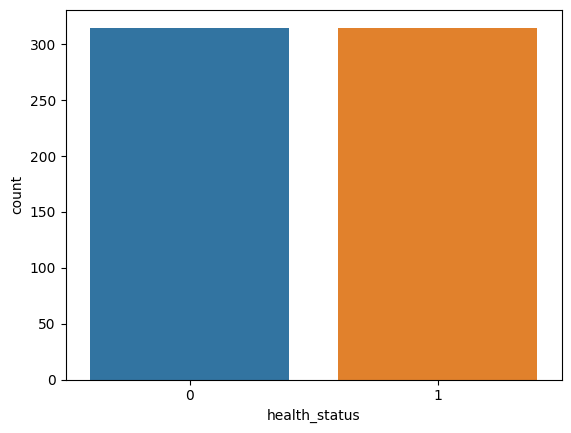

In [10]:
# Check Count of labels
import seaborn as sns
sns.countplot(x='health_status',data=dataset)

In [11]:
X = dataset.iloc[:, 0:9].values
x = dataset.iloc[:, 0:9]
y = dataset.iloc[:, 9].values
y_name = dataset.iloc[:, 9:10]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (630, 9)
y shape: (630, 1)


In [12]:
# iterating the columns
print("Attributes:\n")
for col in x.columns:
    print(col)

print("\n")
print("Class:")
for col in y_name.columns:
    print(col)

Attributes:

patient_id
Snoring_Range_dB
Respiration_Rate_bpm
Body_Temperature
Limb_Movement_Rate
Blood_Oxygen_Range
Rapid_Eye_Movement
Heart_Rate
Suger_Level


Class:
health_status


# Feature Correlation

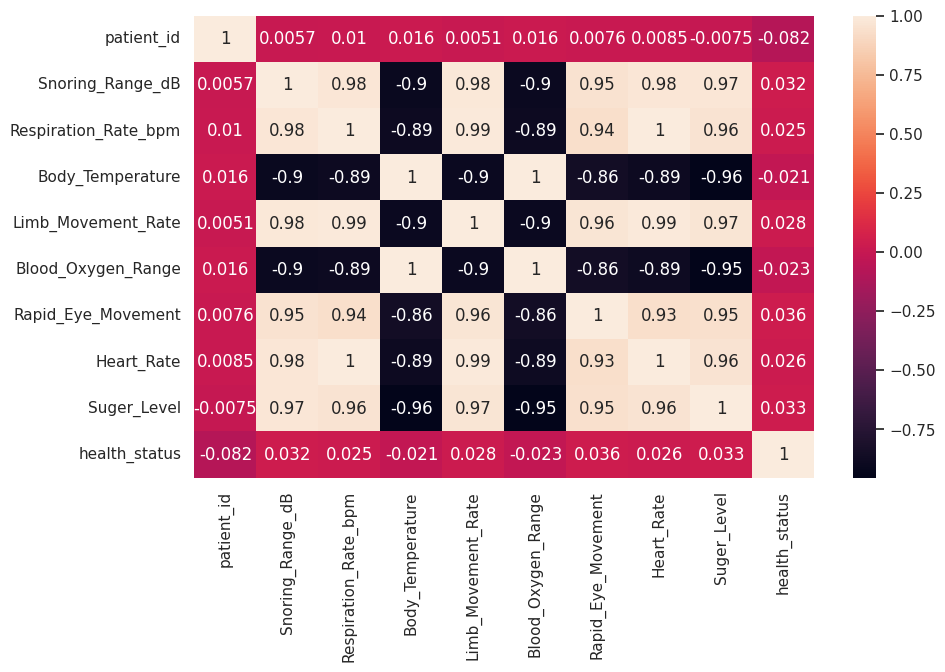

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

#  Spliting the dataset into Training set and Test set

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ----------------**Train The Model**-----------



#  SVM

In [16]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf',probability=True, random_state = 0)

In [17]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [18]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[32 23]
 [35 36]]


Text(0.5, 1.0, 'SVM')

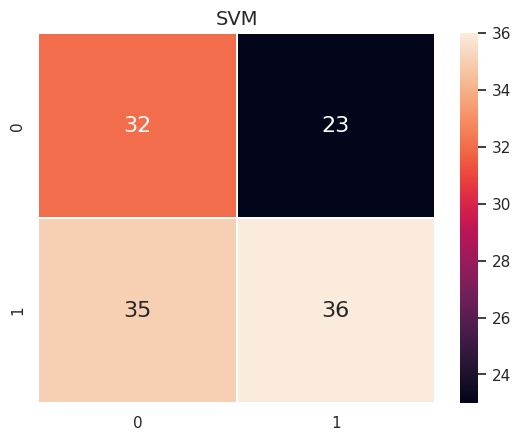

In [20]:
sn.heatmap(cm_svm, annot= True, annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('SVM', size=14)


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_svm)
pre = precision_score(y_test, y_pred_svm)
re  = recall_score(y_test, y_pred_svm)
f1  = f1_score(y_test, y_pred_svm)

In [22]:
print("Summary of SVM")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of SVM
Accuracy    = 0.5396825396825397
Precison    = 0.6101694915254238
Recall      = 0.5070422535211268
f1 score    = 0.553846153846154


# ROC of SVM

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [24]:
prob_all_svm = classifier_svm.predict_proba(X_test)

In [25]:
# keep probabilities for the positive outcome only
probs_svm = prob_all_svm[:, 1]

In [26]:
# calculate scores
auc_svm = roc_auc_score(y_test, probs_svm)
print('SVM: ROC AUC=%.3f' % (auc_svm))

SVM: ROC AUC=0.499


In [27]:
# Plot the ROC

# calculate roc curves
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm)

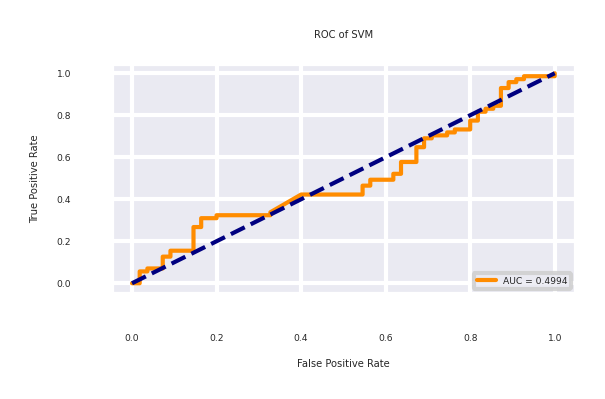

In [28]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=0.2)
sn.set_style("darkgrid")
plt.plot(fpr_svm, tpr_svm,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_svm)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', random_state = 1, max_depth = 1, min_samples_leaf=1, min_samples_split = 10)

In [30]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, min_samples_split=10, random_state=1)

In [31]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[29 26]
 [ 2 69]]


Text(0.5, 1.0, 'Decision Tree')

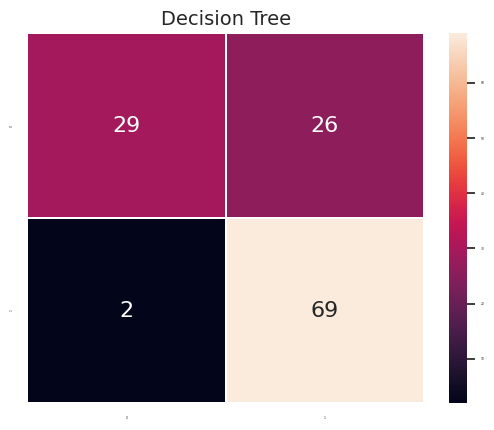

In [33]:
sn.heatmap(cm_dt, annot= True, annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('Decision Tree', size=14)


In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_dt)
pre = precision_score(y_test, y_pred_dt)
re  = recall_score(y_test, y_pred_dt)
f1  = f1_score(y_test, y_pred_dt)

In [35]:
print("Summary of Decision Tree")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Decision Tree
Accuracy    = 0.7777777777777778
Precison    = 0.7263157894736842
Recall      = 0.971830985915493
f1 score    = 0.8313253012048194


# ROC of Decision Tree

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [37]:
prob_all_dt = classifier_dt.predict_proba(X_test)

In [38]:
# keep probabilities for the positive outcome only
probs_dt = prob_all_dt[:, 1]

In [39]:
# calculate scores
auc_dt = roc_auc_score(y_test, probs_dt)
print('Decision Tree: ROC AUC=%.3f' % (auc_dt))

Decision Tree: ROC AUC=0.750


In [40]:
# Plot the ROC

# calculate roc curves
fpr_dt, tpr_dt, _ = roc_curve(y_test, probs_dt)

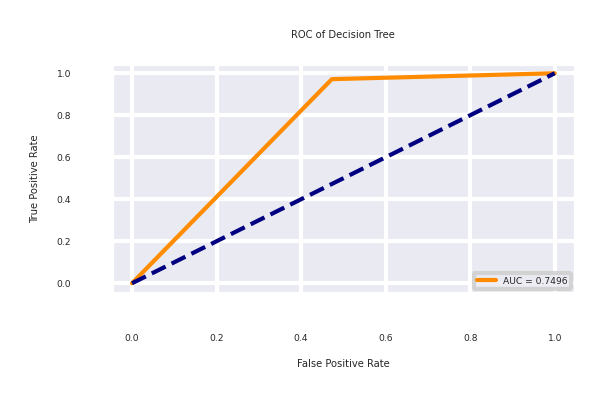

In [41]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_dt, tpr_dt,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Decision Tree")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **LR**

In [42]:

from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(max_iter=500)


In [43]:
# Training the Decision Tree
classifier_lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [44]:
# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)

In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[32 23]
 [39 32]]


Text(0.5, 1.0, 'Logistic Regration')

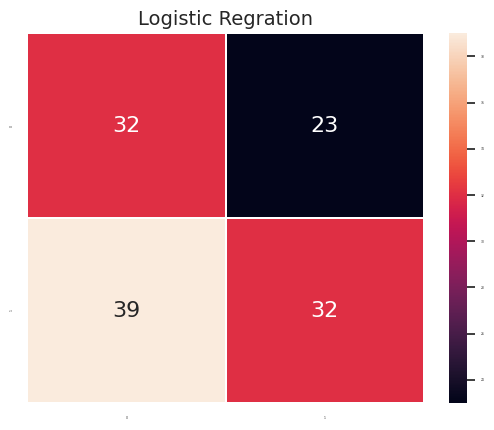

In [46]:
sn.heatmap(cm_lr, annot= True , annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('Logistic Regration', size=14)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_lr)
pre = precision_score(y_test, y_pred_lr)
re  = recall_score(y_test, y_pred_lr)
f1  = f1_score(y_test, y_pred_lr)

In [48]:
print("Summary of Logistic Regration")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Logistic Regration
Accuracy    = 0.5079365079365079
Precison    = 0.5818181818181818
Recall      = 0.4507042253521127
f1 score    = 0.5079365079365079


LR ROC


In [49]:
prob_all_lr = classifier_lr.predict_proba(X_test)

In [50]:
# keep probabilities for the positive outcome only
probs_lr = prob_all_lr[:, 1]

In [51]:
# calculate scores
auc_lr = roc_auc_score(y_test, probs_lr)
print('Logistic Regration: ROC AUC=%.3f' % (auc_lr))

Logistic Regration: ROC AUC=0.521


In [52]:
# Plot the ROC

# calculate roc curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, probs_lr)

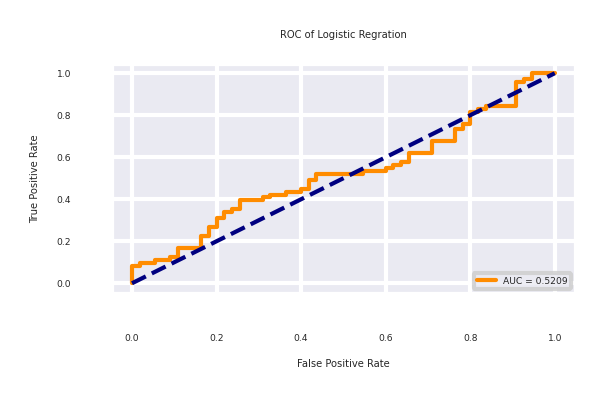

In [53]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_lr, tpr_lr,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_lr)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Logistic Regration")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


# **AdaBoostClassifier**

In [54]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [55]:
# Create an AdaBoost classifier using the Random Forest as the base model
classifier_Ada  = AdaBoostClassifier( n_estimators=50, learning_rate=1.0, random_state=42)

In [56]:
# Training the Decision Tree
classifier_Ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [135]:
# Predicting the Test set results
y_pred_Ada = classifier_Ada.predict(X_test)

In [136]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
print(cm_Ada)

[[54  1]
 [ 2 69]]


Text(0.5, 1.0, 'AdaBoost')

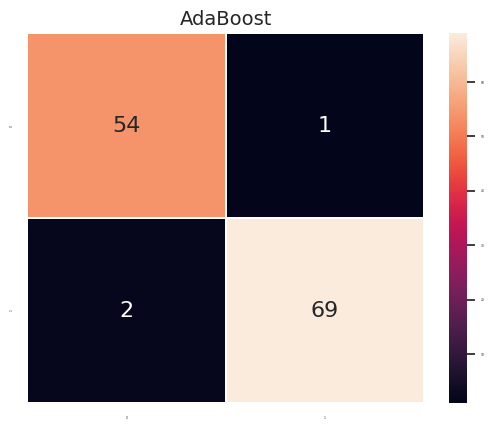

In [137]:

sn.heatmap(cm_Ada, annot= True, annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('AdaBoost', size=14)

Adabost Roc

In [140]:
prob_all_Ada = classifier_Ada.predict_proba(X_test)

In [144]:
# keep probabilities for the positive outcome only
probs_Ada = prob_all_lr[:, 1]

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_Ada)
pre = precision_score(y_test, y_pred_Ada)
re  = recall_score(y_test, y_pred_Ada)
f1  = f1_score(y_test, y_pred_Ada)

In [149]:
# calculate scores
auc_Ada = roc_auc_score(y_test, probs_Ada)
print('Logistic Regration: ROC AUC=%.3f' % (auc_Ada))

Logistic Regration: ROC AUC=0.521


In [150]:
# Plot the ROC

# calculate roc curves
fpr_Ada, tpr_Ada, _ = roc_curve(y_test, probs_Ada)

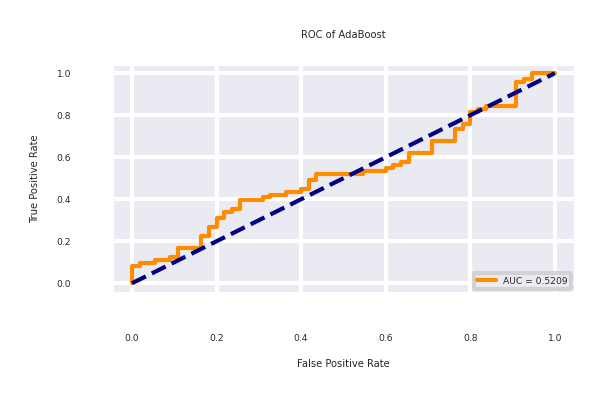

In [134]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_Ada, tpr_Ada,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_Ada)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of AdaBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier


# Train the machine learning model
classifier_rf = RandomForestClassifier(n_estimators=559, max_depth=9)


In [68]:
# Training the Decision Tree
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=559)

In [69]:
# Predicting the Test set results
y_pred_rf = classifier_rf.predict(X_test)

In [70]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[51  4]
 [10 61]]


Text(0.5, 1.0, ' Random Forest')

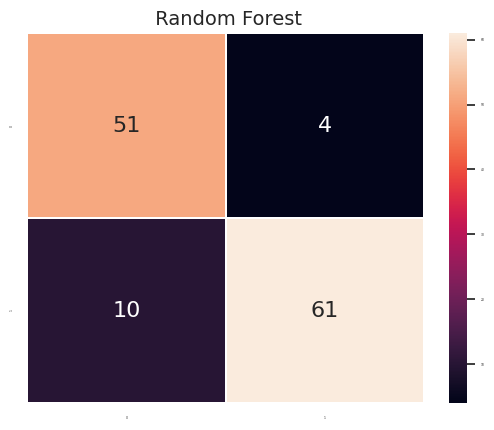

In [71]:
sn.heatmap(cm_rf, annot= True , annot_kws={"size": 16} ,linewidth=.3)
#add title to heatmap
plt.title(' Random Forest', size=14)

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_rf)
pre = precision_score(y_test, y_pred_rf)
re  = recall_score(y_test, y_pred_rf)
f1  = f1_score(y_test, y_pred_rf)

In [152]:
print("Summary of Random Forest")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Random Forest
Accuracy    = 0.8888888888888888
Precison    = 0.9384615384615385
Recall      = 0.8591549295774648
f1 score    = 0.8970588235294118


In [74]:
prob_all_rf = classifier_rf.predict_proba(X_test)

In [75]:
# keep probabilities for the positive outcome only
probs_rf = prob_all_rf[:, 1]

In [76]:
# calculate scores
auc_rf = roc_auc_score(y_test, probs_rf)
print('Random Forest : ROC AUC=%.3f' % (auc_rf))

Random Forest : ROC AUC=0.954


In [77]:
# Plot the ROC

# calculate roc curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, probs_rf)

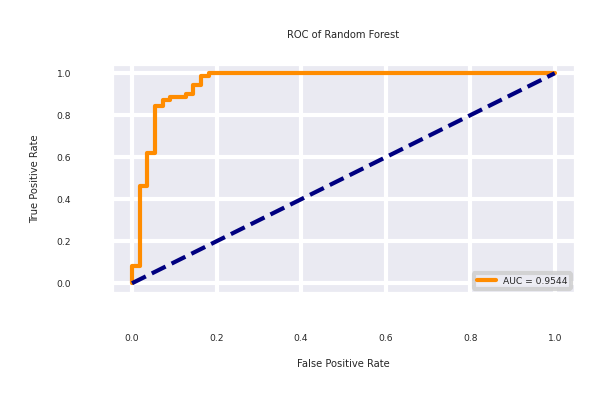

In [78]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_rf, tpr_rf,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **Modified AdaBosst**

**AdaSVM**

In [161]:
# Create an AdaBoost classifier using the Random Forest as the base model
classifier_Ada_svm  = AdaBoostClassifier(base_estimator=classifier_svm, n_estimators=50, learning_rate=1.0, random_state=42)

In [162]:
# Training the Decision Tree
classifier_Ada_svm.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=SVC(probability=True, random_state=0),
                   random_state=42)

In [163]:
# Predicting the Test set results
y_pred_Ada_svm = classifier_Ada_svm.predict(X_test)

In [164]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_Ada_svm = confusion_matrix(y_test, y_pred_Ada_svm)
print(cm_Ada_svm)

[[55  0]
 [71  0]]


Text(0.5, 1.0, 'AdaBoost With SVM')

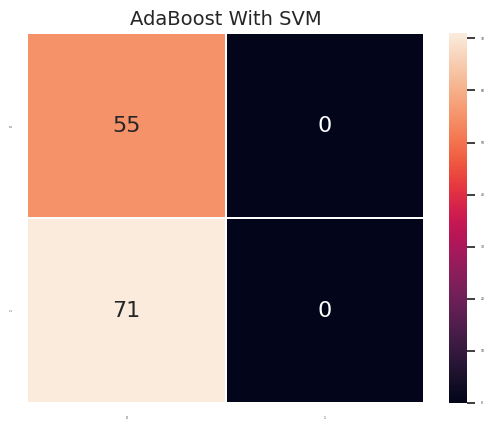

In [83]:
sn.heatmap(cm_Ada_svm, annot= True , annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('AdaBoost With SVM', size=14)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_Ada_svm)
pre = precision_score(y_test, y_pred_Ada_svm)
re  = recall_score(y_test, y_pred_Ada_svm)
f1  = f1_score(y_test, y_pred_Ada_svm)

In [85]:
print("Summary of Random Forest")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Random Forest
Accuracy    = 0.4365079365079365
Precison    = 0.0
Recall      = 0.0
f1 score    = 0.0


In [86]:
prob_all_Ada_svm = classifier_Ada_svm.predict_proba(X_test)

In [87]:
# keep probabilities for the positive outcome only
probs_Ada_svm = prob_all_Ada_svm[:, 1]

In [88]:
# calculate scores
auc_Ada_svm = roc_auc_score(y_test, probs_Ada_svm)
print('AdaBoost With SVM: ROC AUC=%.3f' % (auc_Ada_svm))

AdaBoost With SVM: ROC AUC=0.445


In [89]:
# Plot the ROC

# calculate roc curves
fpr_Ada_svm, tpr_Ada_svm, _ = roc_curve(y_test, probs_Ada_svm)

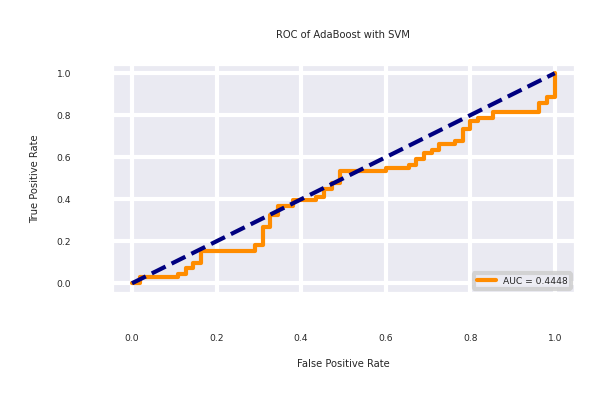

In [90]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_Ada_svm, tpr_Ada_svm,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_Ada_svm)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of AdaBoost with SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**AdaLR**

In [91]:
# Create an AdaBoost classifier using the Random Forest as the base model
classifier_Ada_lr  = AdaBoostClassifier(base_estimator= classifier_lr , n_estimators=50, learning_rate=1.0, random_state=42)

In [92]:
# Training the Decision Tree
classifier_Ada_lr.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=500),
                   random_state=42)

In [93]:
# Predicting the Test set results
y_pred_Ada_lr = classifier_Ada_lr.predict(X_test)

In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_Ada_lr = confusion_matrix(y_test, y_pred_Ada_lr)
print(cm_Ada_lr)

[[33 22]
 [37 34]]


Text(0.5, 1.0, 'AdaBoost With LR')

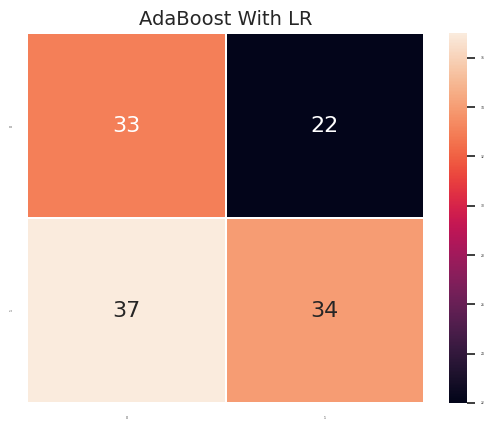

In [95]:

sn.heatmap(cm_Ada_lr, annot= True,  annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('AdaBoost With LR', size=14)

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_Ada_lr)
pre = precision_score(y_test, y_pred_Ada_lr)
re  = recall_score(y_test, y_pred_Ada_lr)
f1  = f1_score(y_test, y_pred_Ada_lr)

In [97]:
print("Summary of Random Forest")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Random Forest
Accuracy    = 0.5317460317460317
Precison    = 0.6071428571428571
Recall      = 0.4788732394366197
f1 score    = 0.5354330708661418


In [98]:
prob_all_Ada_lr = classifier_Ada_lr.predict_proba(X_test)

In [99]:
# keep probabilities for the positive outcome only
probs_Ada_lr = prob_all_Ada_lr[:, 1]

In [100]:
# calculate scores
auc_Ada_lr = roc_auc_score(y_test, probs_Ada_lr)
print('AdaBoost with Logistic Regration: ROC AUC=%.3f' % (auc_Ada_lr))

AdaBoost with Logistic Regration: ROC AUC=0.535


In [101]:
# Plot the ROC

# calculate roc curves
fpr_Ada_lr, tpr_Ada_lr, _ = roc_curve(y_test, probs_Ada_lr)

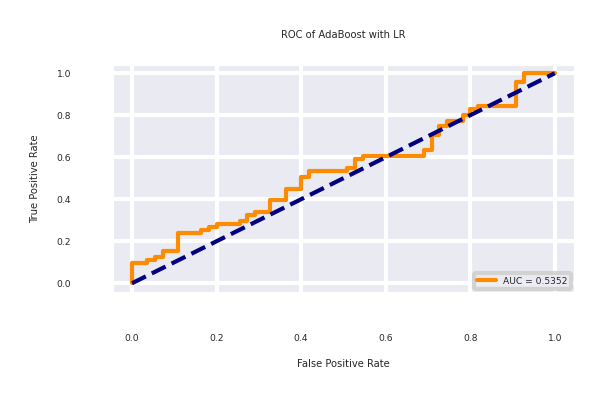

In [102]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_Ada_lr, tpr_Ada_lr,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_Ada_lr)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of AdaBoost with LR")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**AdaDT**

In [103]:
# Create an AdaBoost classifier using the Random Forest as the base model
classifier_Ada_dt  = AdaBoostClassifier( base_estimator=classifier_dt, n_estimators=9, learning_rate=0.09, random_state=9)

In [104]:
# Training the Decision Tree
classifier_Ada_dt.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         min_samples_split=10,
                                                         random_state=1),
                   learning_rate=0.09, n_estimators=9, random_state=9)

In [105]:
# Predicting the Test set results
y_pred_Ada_dt = classifier_Ada_dt.predict(X_test)

In [106]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_Ada_dt = confusion_matrix(y_test, y_pred_Ada_dt)
print(cm_Ada_dt)

[[29 26]
 [ 0 71]]


Text(0.5, 1.0, 'AdaBoost With DT')

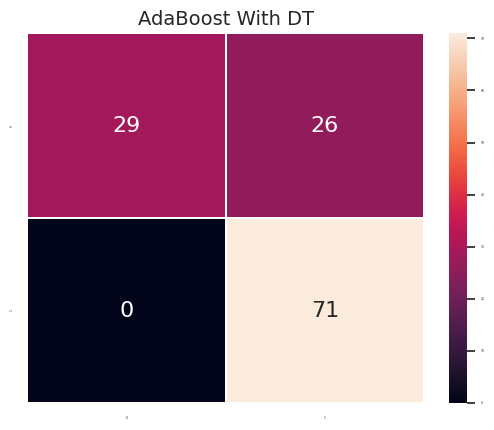

In [107]:
sn.heatmap(cm_Ada_dt, annot= True,  annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('AdaBoost With DT', size=14)

In [108]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_Ada_dt)
pre = precision_score(y_test, y_pred_Ada_dt)
re  = recall_score(y_test, y_pred_Ada_dt)
f1  = f1_score(y_test, y_pred_Ada_dt)

In [109]:
print("Summary of Random Forest")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Random Forest
Accuracy    = 0.7936507936507936
Precison    = 0.7319587628865979
Recall      = 1.0
f1 score    = 0.8452380952380951


In [110]:
prob_all_Ada_dt = classifier_Ada_dt.predict_proba(X_test)

In [111]:
# keep probabilities for the positive outcome only
probs_Ada_dt = prob_all_Ada_dt[:, 1]

In [112]:
# calculate scores
auc_Ada_dt = roc_auc_score(y_test, probs_Ada_dt)
print('AdaBoost With Decision Tree: ROC AUC=%.3f' % (auc_Ada_dt))

AdaBoost With Decision Tree: ROC AUC=0.890


In [113]:
# Plot the ROC

# calculate roc curves
fpr_Ada_dt, tpr_Ada_dt, _ = roc_curve(y_test, probs_Ada_dt)

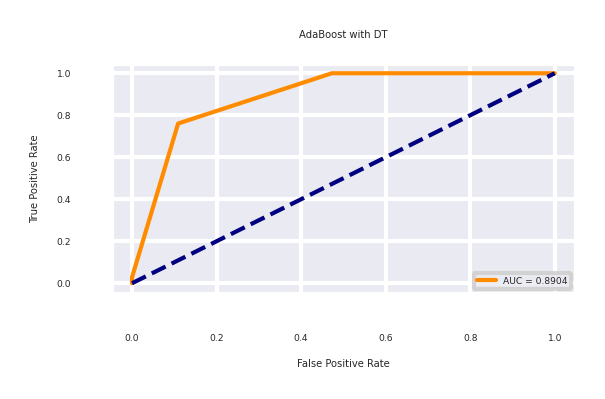

In [114]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_Ada_dt, tpr_Ada_dt,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_Ada_dt)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("AdaBoost with DT")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**AdaRAndom**

In [115]:
# Create an AdaBoost classifier using the Random Forest as the base model
classifier_Ada_random  = AdaBoostClassifier( base_estimator=classifier_rf, n_estimators=50, learning_rate=1.0, random_state=42)

In [116]:
# Training the Decision Tree
classifier_Ada_random.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=9,
                                                         n_estimators=559),
                   random_state=42)

In [117]:
# Predicting the Test set results
y_pred_Ada_random = classifier_Ada_random.predict(X_test)

In [118]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_Ada_random = confusion_matrix(y_test, y_pred_Ada_random)
print(cm_Ada_random)

[[51  4]
 [11 60]]


Text(0.5, 1.0, 'AdaBoost With RF')

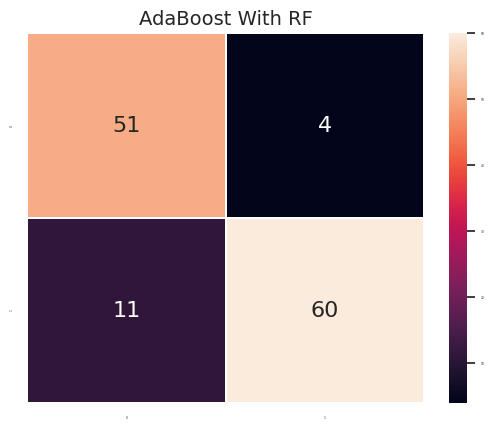

In [119]:
sn.heatmap(cm_Ada_random, annot= True, annot_kws={"size": 16},linewidth=.3)
#add title to heatmap
plt.title('AdaBoost With RF', size=14)

In [120]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
ac  = accuracy_score(y_test, y_pred_Ada_random)
pre = precision_score(y_test, y_pred_Ada_random)
re  = recall_score(y_test, y_pred_Ada_random)
f1  = f1_score(y_test, y_pred_Ada_random)

In [121]:
print("Summary of Random Forest")
print("Accuracy    =", ac)
print("Precison    =",pre)
print("Recall      =", re)
print("f1 score    =", f1)

Summary of Random Forest
Accuracy    = 0.8809523809523809
Precison    = 0.9375
Recall      = 0.8450704225352113
f1 score    = 0.8888888888888888


In [122]:
prob_all_Ada_random = classifier_Ada.predict_proba(X_test)

In [123]:
# keep probabilities for the positive outcome only
probs_Ada_random = prob_all_Ada_random[:, 1]

In [124]:
# calculate scores
auc_Ada_random = roc_auc_score(y_test, probs_Ada_random)
print('Adaboost with Random Forest: ROC AUC=%.3f' % (auc_Ada_random))

Adaboost with Random Forest: ROC AUC=0.973


In [125]:
# Plot the ROC

# calculate roc curves
fpr_Ada_random, tpr_Ada_random, _ = roc_curve(y_test, probs_Ada_random)

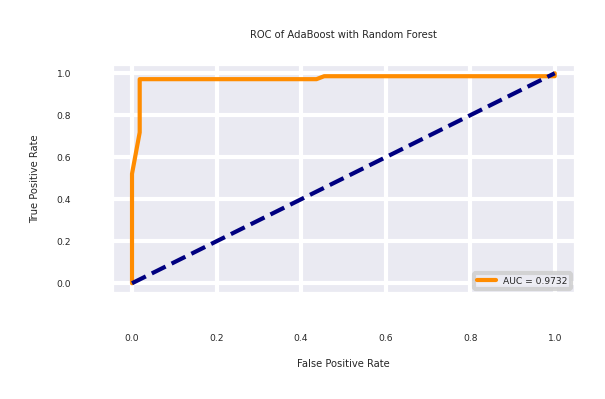

In [126]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_Ada_random, tpr_Ada_random,linewidth=1,color='darkorange', label = 'AUC = %0.4f' % auc_Ada_random)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC of AdaBoost with Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **FINAL CURVE**

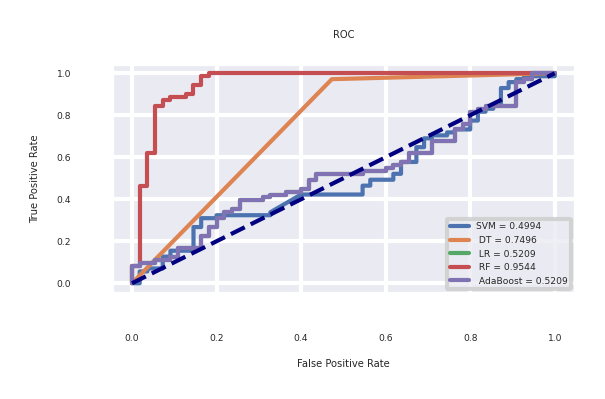

In [127]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
#plt.plot(fpr_knn, tpr_knn,linewidth=1, label = 'KNN = %0.4f' % auc_knn)
plt.plot(fpr_svm, tpr_svm,linewidth=1, label = 'SVM = %0.4f' % auc_svm)
plt.plot(fpr_dt, tpr_dt,linewidth=1,   label =  ' DT = %0.4f' % auc_dt)
plt.plot(fpr_lr, tpr_lr,linewidth=1,   label =  ' LR = %0.4f' % auc_lr)
plt.plot(fpr_rf, tpr_rf,linewidth=1,   label =  ' RF = %0.4f' % auc_rf)
plt.plot(fpr_Ada, tpr_Ada,linewidth=1,   label =  ' AdaBoost = %0.4f' % auc_Ada)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

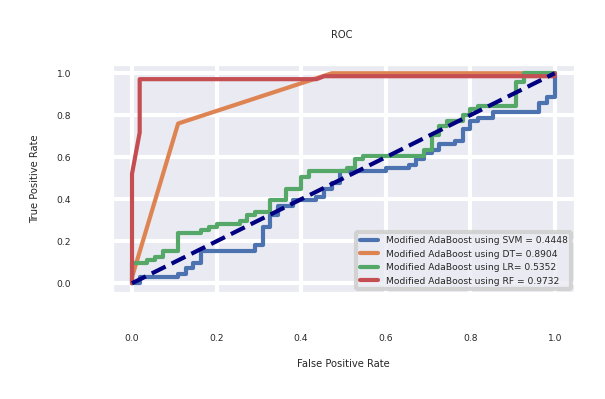

In [128]:
plt.figure(figsize=(2,1), dpi=300)
sn.set(font_scale=.2)
sn.set_style("darkgrid")
plt.plot(fpr_Ada_svm, tpr_Ada_svm,linewidth=1, label = 'Modified AdaBoost using SVM = %0.4f' % auc_Ada_svm)
plt.plot(fpr_Ada_dt, tpr_Ada_dt,linewidth=1,   label =  'Modified AdaBoost using DT= %0.4f' % auc_Ada_dt)
plt.plot(fpr_Ada_lr, tpr_Ada_lr,linewidth=1,   label =  'Modified AdaBoost using LR= %0.4f' % auc_Ada_lr)
plt.plot(fpr_Ada_random, tpr_Ada_random,linewidth=1,   label =  'Modified AdaBoost using RF = %0.4f' % auc_Ada_random)
plt.plot([0, 1], [0, 1], color='navy', linewidth=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC ")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()